# Run test

In [77]:
import os
import numpy as np

step = 1
vs = np.arange(1, 7+step, step)
vs = vs*1e6

step = 1
vs2 = np.arange(6, 9+step, step)
vs2 = vs2*1e9

step = 0.2
vs3 = np.arange(9.5, 12, step)
vs3 = vs3*1e9

vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

for v in vv:
  print(v)
  cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr_neco -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP --dppV={v} > /dev/null 2>&1"
  os.system(cmd)
  cmd = f"mv alpha.txt alphaDPP_V{v:.2e}.txt"
  os.system(cmd)
  cmd = f"mv res.txt resDPP_V{v:.2e}.txt"
  os.system(cmd)

[0.00e+00 1.00e+06 2.00e+06 3.00e+06 4.00e+06 5.00e+06 6.00e+06 7.00e+06
 8.00e+06 9.00e+06 1.00e+07 6.00e+09 7.00e+09 8.00e+09 9.00e+09 9.50e+09
 9.60e+09 9.70e+09 9.80e+09 9.90e+09 1.00e+10 1.01e+10 1.02e+10 1.03e+10
 1.04e+10 1.05e+10 1.06e+10 1.07e+10 1.08e+10 1.09e+10 1.10e+10 1.11e+10
 1.12e+10 1.13e+10 1.14e+10 1.15e+10 1.16e+10 1.17e+10 1.18e+10 1.19e+10
 1.20e+10]
0.0
1000000.0
2000000.0
3000000.0
4000000.0
5000000.0
6000000.0
7000000.0
8000000.0
9000000.0
10000000.0
6000000000.0
7000000000.0
8000000000.0
9000000000.0
9500000000.0
9600000000.0
9700000000.0
9799999999.999998
9899999999.999998
9999999999.999998
10099999999.999998
10199999999.999998
10299999999.999998
10399999999.999996
10499999999.999996
10599999999.999996
10699999999.999996
10799999999.999996
10899999999.999994
10999999999.999994
11099999999.999994
11199999999.999994
11299999999.999994
11399999999.999992
11499999999.999992
11599999999.999992
11699999999.999992
11799999999.999992
11899999999.999992
11999999999.9

# Print formatted data

In [113]:
import pandas as pd
import os
import numpy as np

# Read data
step = 1
vs = np.arange(1, 7+step, step)
vs = vs*1e6

step = 1
vs2 = np.arange(6, 9+step, step)
vs2 = vs2*1e9

step = 0.2
vs3 = np.arange(9.5, 12, step)
vs3 = vs3*1e9

vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

thPutRes = pd.DataFrame()
for v in vv:
  fn = f"resDPP_V{v:.2e}.txt"
  df = pd.read_csv(fn, delimiter= '\t')
  avgLow = df.head(4)['Thput'].mean()
  avgHigh = df.tail(4)['Thput'].mean()
  thPutRes[f'V{v:.2e}'] = [avgLow, avgHigh]
print(thPutRes)
thPutRes.to_csv('fig2Aux.csv', sep='\t')

prbsRes = pd.DataFrame()
for v in vv:
  fn = f"alphaDPP_V{v:.2e}.txt"
  df = pd.read_csv(fn, delimiter= '\t')
  avgLow = df[df['UE'] <= 4]['resources'].mean()
  avgHigh = df[df['UE'] > 4]['resources'].mean()
  prbsRes[f'V{v:.2e}'] = [avgHigh, avgLow]
print(prbsRes)
prbsRes.to_csv('fig3Aux.csv', sep='\t')

[0.00e+00 1.00e+06 2.00e+06 3.00e+06 4.00e+06 5.00e+06 6.00e+06 7.00e+06
 6.00e+09 7.00e+09 8.00e+09 9.00e+09 9.50e+09 9.70e+09 9.90e+09 1.01e+10
 1.03e+10 1.05e+10 1.07e+10 1.09e+10 1.11e+10 1.13e+10 1.15e+10 1.17e+10
 1.19e+10]
   V0.00e+00  V1.00e+06  V2.00e+06  V3.00e+06  V4.00e+06  V5.00e+06  \
0   3.715767   4.206310   4.488120   3.950395   3.859610   3.746395   
1   5.016698   5.016698   5.016698   5.016698   5.016698   5.016698   

   V6.00e+06  V7.00e+06  V6.00e+09  V7.00e+09  ...  V1.01e+10  V1.03e+10  \
0   3.659538   3.604987   0.000000   0.000000  ...     0.0000   0.000000   
1   5.016698   5.016698   5.011935   5.011812  ...     4.4945   4.483218   

   V1.05e+10  V1.07e+10  V1.09e+10  V1.11e+10  V1.13e+10  V1.15e+10  \
0    0.00000   0.000000   0.000000   0.000000   0.000000   0.000000   
1    4.47974   4.476522   4.473718   4.444107   4.415647   4.220268   

   V1.17e+10  V1.19e+10  
0   0.000000   0.000000  
1   4.024237   4.000325  

[2 rows x 25 columns]
   V0.00e+00

# Create paper figures

RR
MR
PF
Qos


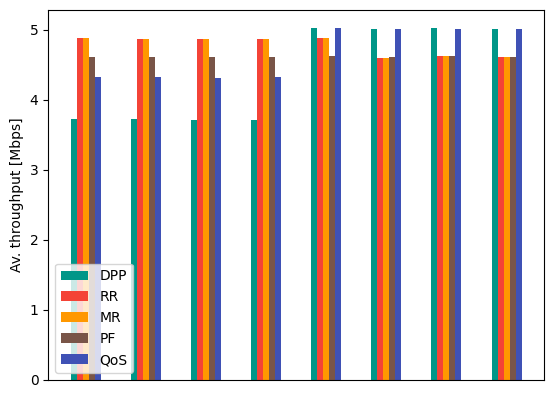

In [49]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os

# Run other schedulers
for s in ['RR', 'MR', 'PF', 'Qos']:
        print(s)
        if not os.path.isfile(f"res{s}.txt"):
                cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr_neco -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType={s} > /dev/null 2>&1"
                os.system(cmd)
                cmd = f"mv res.txt res{s}.txt"
                os.system(cmd)

# Read data
dpp = []
with open('resDPP_V0.00e+00.txt') as File:
        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                quoting=csv.QUOTE_MINIMAL)
        for row in reader:
                if row[0] != "Thput":
                        dpp.append(float(row[0]))
rr = []
with open('resRR.txt') as File:
        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                quoting=csv.QUOTE_MINIMAL)
        for row in reader:
                if row[0] != 'Thput':
                        rr.append(float(row[0]))
mr = []
with open('resMR.txt') as File:
        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                quoting=csv.QUOTE_MINIMAL)
        for row in reader:
                if row[0] != 'Thput':
                        mr.append(float(row[0]))
pf = []
with open('resPF.txt') as File:
        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                quoting=csv.QUOTE_MINIMAL)
        for row in reader:
                if row[0] != 'Thput':
                        pf.append(float(row[0]))
qos = []
with open('resQos.txt') as File:
        reader = csv.reader(File, delimiter='\t', quotechar=',',
                                quoting=csv.QUOTE_MINIMAL)
        for row in reader:
                if row[0] != 'Thput':
                        qos.append(float(row[0]))

# Plot
plt.figure()
x = np.arange(len(dpp))
plt.bar(x-0.2, dpp, 0.1, label='DPP', color='#009688')
plt.bar(x-0.1, rr, 0.1, label='RR', color='#f44336')
plt.bar(x, mr, 0.1, label='MR', color='#ff9800')
plt.bar(x+0.1, pf, 0.1, label='PF', color='#795548')
plt.bar(x+0.2, qos, 0.1, label='QoS', color='#3f51b5')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])
plt.legend(loc='lower left')

[0.00e+00 1.00e+06 2.00e+06 3.00e+06 4.00e+06 5.00e+06 6.00e+06 7.00e+06
 6.00e+09 7.00e+09 8.00e+09 9.00e+09 9.50e+09 9.70e+09 9.90e+09 1.01e+10
 1.03e+10 1.05e+10 1.07e+10 1.09e+10 1.11e+10 1.13e+10 1.15e+10 1.17e+10
 1.19e+10]


([], [])

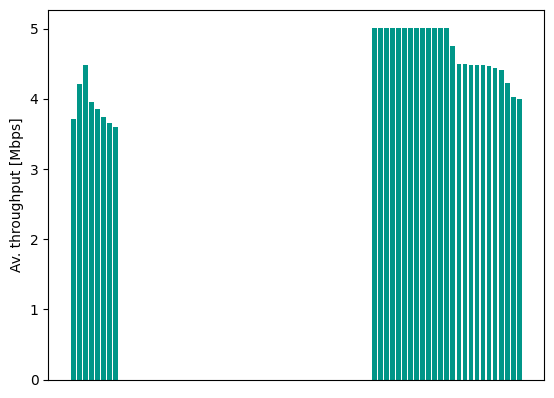

In [110]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

# Read data
step = 1
vs = np.arange(1, 7+step, step)
vs = vs*1e6

step = 1
vs2 = np.arange(6, 9+step, step)
vs2 = vs2*1e9

step = 0.2
vs3 = np.arange(9.5, 12, step)
vs3 = vs3*1e9

vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

avgLow,avgHigh = [],[]
for v in vv:
        fn = f"resDPP_V{v:.2e}.txt"
        df = pd.read_csv(fn, delimiter= '\t')
        avgLow.append(df.head(4)['Thput'].mean())
        avgHigh.append(df.tail(4)['Thput'].mean())

# Plot
plt.figure()
x = np.arange(len(avgLow))
plt.bar(x,avgLow, color='#009688')
plt.bar(x+2*len(avgLow),avgHigh, color='#009688')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])

25


([], [])

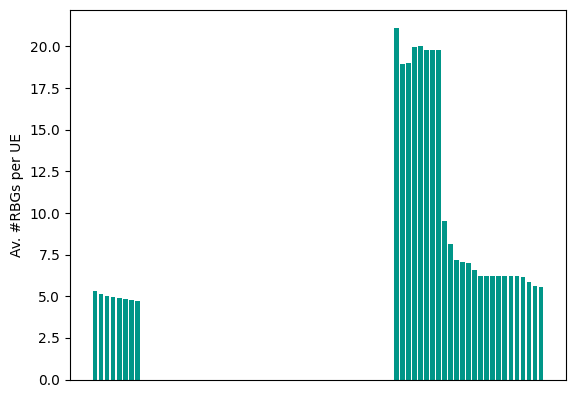

In [107]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

# Read data
step = 1
vs = np.arange(1, 7+step, step)
vs = vs*1e6

step = 1
vs2 = np.arange(6, 9+step, step)
vs2 = vs2*1e9

step = 0.2
vs3 = np.arange(9.5, 12, step)
vs3 = vs3*1e9

vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

avgLow,avgHigh = [],[]
prbsRes = pd.DataFrame()
for v in vv:
    fn = f"alphaDPP_V{v:.2e}.txt"
    df = pd.read_csv(fn, delimiter= '\t')
    avgLow.append(df[df['UE'] > 4]['resources'].mean())
    avgHigh.append(df[df['UE'] <= 4]['resources'].mean())

# Plot
plt.figure()
x = np.arange(len(avgLow))
plt.bar(x,avgLow, color='#009688')
plt.bar(x+2*len(avgLow),avgHigh, color='#009688')
plt.ylabel("Av. #RBGs per UE")
plt.xticks([])